In [1]:
import pandas as pd
import numpy as np
import LinearModels as LM
import matplotlib.pyplot as plt
import NonLinearModels_post as nlm
from matplotlib.ticker import FormatStrFormatter

In [2]:
pd.options.display.float_format = '{:.4f}'.format
path = "../Sourcecode/"

In [3]:
# CHOICE DATA
choice_data = pd.read_csv(path + 'clogit__data_subset.csv', delimiter=',', encoding = 'unicode_escape')

In [4]:
choice_data.rename(columns = {'Prices (2015-DKK)': 'Nypris'}, inplace = True)
choice_data.rename(columns = {'Weight (kg)': 'Weight'}, inplace = True)

In [5]:
choice_data

,Unnamed: 0,ID,Fuel,Diesel,El,Key,Fuel-size segment,Registrations,Size segment,Year,...,Weight,Engine effect (kW),Nypris,Cost/km (DKK),Size (m3),Horsepower,Ownership cost (DKK),CO2,Effi,Fuelchoice
0,0,0,Benzin,0,0,toyota-avensis-2006-Benzin,BenzinSmall,5428,Small,2006,...,1820,108.0000,403349.2991,0.8137,12.5734,139.3077,346885.2055,172.0863,13.9000,2
1,1,1,Diesel,1,0,volkswagen-passat-2006-Diesel,DieselLarge,5378,Large,2006,...,2170,103.0000,378504.6729,0.6819,12.7349,128.3333,352803.0140,177.1812,14.9000,1
2,2,2,Benzin,0,0,renault-clio-2006-Benzin,BenzinSmall,4518,Small,2006,...,1425,43.0000,134344.6262,0.6772,8.8727,60.0000,118899.0321,143.2335,16.7000,2
3,3,3,Benzin,0,0,suzuki-swift-2006-Benzin,BenzinSmall,4406,Small,2006,...,1475,68.0000,163536.2150,0.7344,9.3795,94.0000,135059.8194,155.3247,15.4000,2
4,4,4,Benzin,0,0,fiat-punto-2006-Benzin,BenzinSmall,3743,Small,2006,...,1590,48.0000,150287.3832,0.6896,9.4832,63.8889,135188.4225,145.8537,16.4000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,3353,2785,Diesel,1,0,dacia-duster-2020-Diesel,DieselSmall,82,Small,2020,...,1848,85.0000,170224.3714,0.4011,13.2023,103.7500,171706.7217,98.5075,26.8000,1
2786,3378,2786,Benzin,0,0,volkswagen-golf-sportsvan-2020-Benzin,BenzinLarge,818,Large,2020,...,1930,110.0000,303593.8104,0.5837,12.4115,150.0000,272550.6403,115.0000,20.8000,2
2787,3379,2787,El,0,1,volkswagen-up-2020-El,ElSmall,370,Small,2020,...,1530,61.0000,153689.5551,0.3068,8.8558,61.2222,138192.7473,0.0000,697.2973,0
2788,3380,2788,Benzin,0,0,volkswagen-t-cross-2020-Benzin,BenzinSmall,2969,Small,2020,...,1760,85.0000,263941.9729,0.5420,11.4291,115.0000,237167.8115,106.7857,22.4000,2



FE data for plotting:
         Year  Engine effect (kW)
Fuel                            
Benzin  2006            108.0000
Diesel  2006            103.0000
Benzin  2006             43.0000
Benzin  2006             68.0000
Benzin  2006             48.0000
...      ...                 ...
Diesel  2020             85.0000
Benzin  2020            110.0000
El      2020             61.0000
Benzin  2020             85.0000
Benzin  2020            110.0000

[2790 rows x 2 columns]

FE EL means:
 Year
2011    42.5000
2012    55.0000
2013    44.4000
2014    68.6667
2015    79.5714
2016   107.2857
2017   168.1429
2018   163.7500
2019   209.6429
2020   169.7600
Name: Engine effect (kW), dtype: float64

FE Benzin means :
 Year
2006   102.4771
2007   100.3700
2008   105.5400
2009   120.0825
2010   103.8319
2011    97.3563
2012   101.6536
2013    93.7341
2014   100.0121
2015   100.2234
2016    99.9221
2017   101.5149
2018   101.9593
2019    96.1905
2020    97.9633
Name: Engine effect (kW), dtype: flo

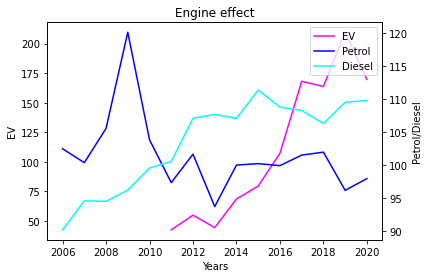

In [6]:
# Engineeffect plot
e_data = choice_data[['Year', 'Engine effect (kW)', 'Fuel']].set_index(['Fuel'])
print("\nFE data for plotting:\n", e_data)

e_el_data = e_data.loc['El']
e_el_means = e_el_data.groupby('Year')['Engine effect (kW)'].mean()
print("\nFE EL means:\n", e_el_means)

e_benzin_data = e_data.loc['Benzin']
e_benzin_means = e_benzin_data.groupby('Year')['Engine effect (kW)'].mean()
print("\nFE Benzin means :\n", e_benzin_means)

e_diesel_data = e_data.loc['Diesel']
e_diesel_means = e_diesel_data.groupby('Year')['Engine effect (kW)'].mean()
print("\nFE Diesel means :\n", e_diesel_means)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Years')
ax1.set_ylabel('EV', color = 'black') 
plot_1 = ax1.plot(list(e_el_data['Year'].drop_duplicates()), e_el_means, color = 'magenta', label = 'EV') 
ax1.tick_params(axis ='y', labelcolor = 'black') 

ax2 = ax1.twinx()
ax2.set_ylabel('Petrol/Diesel', color = 'black') 
plot_2 = ax2.plot(list(e_benzin_data['Year'].drop_duplicates()), e_benzin_means, color = 'blue', label = 'Petrol') 
ax2.tick_params(axis ='y', labelcolor = 'black')

plot_3 = plt.plot(list(e_diesel_data['Year'].drop_duplicates()), e_diesel_means, color = 'cyan', label = 'Diesel') 

plt.title("Engine effect") 

lns = plot_1 + plot_2 + plot_3
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc = 0)

plt.show()


Size data for plotting:
         Year  Weight
Fuel                
Benzin  2006    1820
Diesel  2006    2170
Benzin  2006    1425
Benzin  2006    1475
Benzin  2006    1590
...      ...     ...
Diesel  2020    1848
Benzin  2020    1930
El      2020    1530
Benzin  2020    1760
Benzin  2020    1860

[2790 rows x 2 columns]

Size EL means:
 Year
2011   1736.5000
2012   1812.6667
2013   2000.2000
2014   1926.3333
2015   1974.2857
2016   2103.7143
2017   2105.0000
2018   2092.5000
2019   2354.5000
2020   2151.3200
Name: Weight, dtype: float64

Size Benzin means :
 Year
2006   1823.0734
2007   1801.1100
2008   1786.5800
2009   1832.8454
2010   1782.5106
2011   1780.0460
2012   1778.7976
2013   1722.7882
2014   1752.4615
2015   1764.1489
2016   1787.5684
2017   1790.0198
2018   1815.1204
2019   1825.4286
2020   1857.2653
Name: Weight, dtype: float64

Size Diesel means :
 Year
2006   2022.2468
2007   2051.5000
2008   1997.2442
2009   2002.6067
2010   2075.4348
2011   2097.8144
2012   2081.161

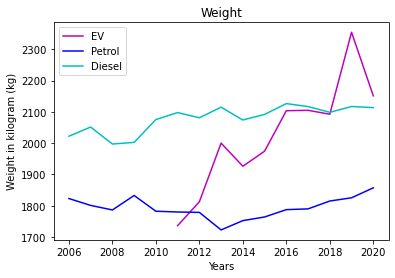

In [7]:
# Weight in kg plot
weight_data = choice_data[['Year', 'Weight', 'Fuel']].set_index(['Fuel'])
print("\nSize data for plotting:\n", weight_data)

weight_el_data = weight_data.loc['El']
weight_el_means = weight_el_data.groupby('Year')['Weight'].mean()
print("\nSize EL means:\n", weight_el_means)

weight_benzin_data = weight_data.loc['Benzin']
weight_benzin_means = weight_benzin_data.groupby('Year')['Weight'].mean()
print("\nSize Benzin means :\n", weight_benzin_means)

weight_diesel_data = weight_data.loc['Diesel']
weight_diesel_means = weight_diesel_data.groupby('Year')['Weight'].mean()
print("\nSize Diesel means :\n", weight_diesel_means)

plt.plot(list(weight_el_data['Year'].drop_duplicates()), weight_el_means, color = 'm', label = 'EV')
plt.plot(list(weight_benzin_data['Year'].drop_duplicates()), weight_benzin_means, color = 'b', label = 'Petrol')
plt.plot(list(weight_diesel_data['Year'].drop_duplicates()), weight_diesel_means, color = 'c', label = 'Diesel')

plt.xlabel("Years")
plt.ylabel("Weight in kilogram (kg)")
plt.title("Weight")
  
plt.legend()
plt.show()


Size data for plotting:
         Year  Size (m3)
Fuel                   
Benzin  2006    12.5734
Diesel  2006    12.7349
Benzin  2006     8.8727
Benzin  2006     9.3795
Benzin  2006     9.4832
...      ...        ...
Diesel  2020    13.2023
Benzin  2020    12.4115
El      2020     8.8558
Benzin  2020    11.4291
Benzin  2020    12.0868

[2790 rows x 2 columns]

Size EL means:
 Year
2011   10.3965
2012   11.0567
2013   11.7151
2014   11.5043
2015   12.0762
2016   12.4636
2017   12.4340
2018   12.4680
2019   13.1455
2020   12.0464
Name: Size (m3), dtype: float64

Size Benzin means :
 Year
2006   11.3753
2007   11.2269
2008   11.1772
2009   11.3545
2010   11.2386
2011   11.3701
2012   11.1973
2013   11.0449
2014   11.4189
2015   11.3969
2016   11.5238
2017   11.4957
2018   11.7370
2019   11.7589
2020   11.7908
Name: Size (m3), dtype: float64

Size Diesel means :
 Year
2006   12.1261
2007   12.2026
2008   12.0873
2009   12.1340
2010   12.5843
2011   12.7201
2012   12.6263
2013   12.7780
20

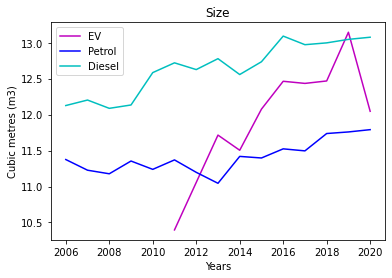

In [8]:
# MAKING SIZE (m3) PLOT
size_data = choice_data[['Year', 'Size (m3)', 'Fuel']].set_index(['Fuel'])
print("\nSize data for plotting:\n", size_data)

size_el_data = size_data.loc['El']
size_el_means = size_el_data.groupby('Year')['Size (m3)'].mean()
print("\nSize EL means:\n", size_el_means)

size_benzin_data = size_data.loc['Benzin']
size_benzin_means = size_benzin_data.groupby('Year')['Size (m3)'].mean()
print("\nSize Benzin means :\n", size_benzin_means)

size_diesel_data = size_data.loc['Diesel']
size_diesel_means = size_diesel_data.groupby('Year')['Size (m3)'].mean()
print("\nSize Diesel means :\n", size_diesel_means)

plt.plot(list(size_el_data['Year'].drop_duplicates()), size_el_means, color = 'm', label = 'EV')
plt.plot(list(size_benzin_data['Year'].drop_duplicates()), size_benzin_means, color = 'b', label = 'Petrol')
plt.plot(list(size_diesel_data['Year'].drop_duplicates()), size_diesel_means, color = 'c', label = 'Diesel')

plt.xlabel("Years")
plt.ylabel("Cubic metres (m3)")
plt.title("Size")
  
plt.legend()
plt.show()


Size data for plotting:
         Year  Registrations
Fuel                       
Benzin  2006           5428
Diesel  2006           5378
Benzin  2006           4518
Benzin  2006           4406
Benzin  2006           3743
...      ...            ...
Diesel  2020             82
Benzin  2020            818
El      2020            370
Benzin  2020           2969
Benzin  2020           3299

[2790 rows x 2 columns]

El Registrations:
 Year
2011      176
2012      366
2013      550
2014     1987
2015     4694
2016     1430
2017     1261
2018     2106
2019     7048
2020    13763
Name: Registrations, dtype: int64

Market EL means:
 Year
2011   0.0930
2012   0.1897
2013   0.2641
2014   0.9507
2015   2.1718
2016   0.5994
2017   0.5434
2018   0.7725
2019   2.4742
2020   6.4933
Name: Registrations, dtype: float64

Market Benzin means :
 Year
2006   71.3928
2007   59.6492
2008   53.1012
2009   55.5056
2010   52.4216
2011   49.8708
2012   55.4217
2013   63.6564
2014   63.5752
2015   63.2124
2016   

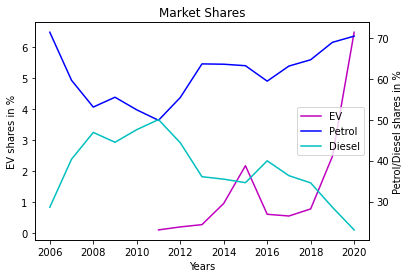

In [9]:
# MARKET SHARES
ms_data = choice_data[['Year', 'Registrations', 'Fuel']].set_index(['Fuel'])
print("\nSize data for plotting:\n", ms_data)

ms_means = ms_data.groupby('Year')['Registrations'].sum()

ms_el_data = ms_data.loc['El']
ms_el_means = (ms_el_data.groupby('Year')['Registrations'].sum() / ms_means) * 100
ms_el_means = ms_el_means.dropna()
print("\nEl Registrations:\n", ms_el_data.groupby('Year')['Registrations'].sum())
print("\nMarket EL means:\n", ms_el_means)

ms_benzin_data = ms_data.loc['Benzin']
ms_benzin_means = (ms_benzin_data.groupby('Year')['Registrations'].sum() / ms_means) * 100
print("\nMarket Benzin means :\n", ms_benzin_means)

ms_diesel_data = ms_data.loc['Diesel']
ms_diesel_means = (ms_diesel_data.groupby('Year')['Registrations'].sum() / ms_means) * 100
print("\nMarket Diesel means :\n", ms_diesel_means)


fig, ax1 = plt.subplots()

ax1.set_xlabel('Years')
ax1.set_ylabel('EV shares in %', color = 'black') 
plot_1 = ax1.plot(list(ms_el_data['Year'].drop_duplicates()), ms_el_means, color = 'm', label = 'EV')
ax1.tick_params(axis ='y', labelcolor = 'black') 

ax2 = ax1.twinx()
ax2.set_ylabel('Petrol/Diesel shares in %', color = 'black') 
plot_2 = ax2.plot(list(ms_benzin_data['Year'].drop_duplicates()), ms_benzin_means, color = 'b', label = 'Petrol') 
ax2.tick_params(axis ='y', labelcolor = 'black')

plot_3 = plt.plot(list(ms_diesel_data['Year'].drop_duplicates()), ms_diesel_means, color = 'c', label = 'Diesel')

plt.title("Market Shares") 

lns = plot_1 + plot_2 + plot_3
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc = 0)


plt.show()


Size data for plotting:
         Year  Registrations
Fuel                       
Benzin  2006           5428
Diesel  2006           5378
Benzin  2006           4518
Benzin  2006           4406
Benzin  2006           3743
...      ...            ...
Diesel  2020             82
Benzin  2020            818
El      2020            370
Benzin  2020           2969
Benzin  2020           3299

[2790 rows x 2 columns]

Size data for plotting:
                    Year  Registrations    Fuel
Fuel-size segment                             
BenzinSmall        2006           5428  Benzin
DieselLarge        2006           5378  Diesel
BenzinSmall        2006           4518  Benzin
BenzinSmall        2006           4406  Benzin
BenzinSmall        2006           3743  Benzin
...                 ...            ...     ...
DieselSmall        2020             82  Diesel
BenzinLarge        2020            818  Benzin
ElSmall            2020            370      El
BenzinSmall        2020           2969  Be

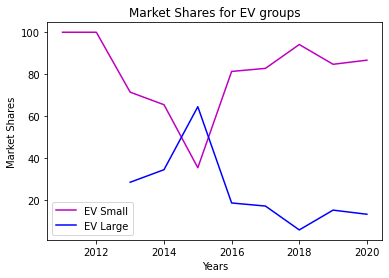

In [10]:
# MARKET SHARES
ms_data = choice_data[['Year', 'Registrations', 'Fuel']].set_index(['Fuel'])
print("\nSize data for plotting:\n", ms_data)

ms_el_data = ms_data.loc['El']
ms_el_means = ms_el_data.groupby('Year')['Registrations'].sum()

ms_data1 = choice_data[['Year', 'Fuel-size segment', 'Registrations', 'Fuel']].set_index(['Fuel-size segment'])
print("\nSize data for plotting:\n", ms_data1)

ms_el = ms_data1.loc['ElSmall']
ms_el_small = (ms_el.groupby('Year')['Registrations'].sum() / ms_el_means) * 100
print("\nSize EL means:\n", ms_el_small)

ms_el_l = ms_data1.loc['ElLarge']
ms_el_large = (ms_el_l.groupby('Year')['Registrations'].sum() / ms_el_means) * 100
ms_el_large = ms_el_large.dropna()
print("\nSize Benzin means :\n", ms_benzin_means)

plt.plot(list(ms_el['Year'].drop_duplicates()), ms_el_small, color = 'm', label = 'EV Small')
plt.plot(list(ms_el_l['Year'].drop_duplicates()), ms_el_large, color = 'b', label = 'EV Large')

plt.xlabel("Years")
plt.ylabel("Market Shares")
plt.title("Market Shares for EV groups")
  
plt.legend()
plt.show()


Size data for plotting:
                    Year      Nypris
Fuel-size segment                  
BenzinSmall        2006 403349.2991
DieselLarge        2006 378504.6729
BenzinSmall        2006 134344.6262
BenzinSmall        2006 163536.2150
BenzinSmall        2006 150287.3832
...                 ...         ...
DieselSmall        2020 170224.3714
BenzinLarge        2020 303593.8104
ElSmall            2020 153689.5551
BenzinSmall        2020 263941.9729
BenzinLarge        2020 254948.7427

[2790 rows x 2 columns]

Size EL means:
 Year
2011   255742.9614
2012   244935.5058
2013   209546.7172
2014   237511.0442
2015   245712.0000
2016   254970.8873
2017   265079.2899
2018   267163.8943
2019   284034.1963
2020   249477.8581
Name: Nypris, dtype: float64

Size EL means:
 Year
2013    849090.9091
2014    612449.7992
2015    711000.0000
2016   1168875.3740
2017   1013908.7773
2018   1005972.1135
2019    926596.3107
2020    811500.3223
Name: Nypris, dtype: float64

Size Benzin means :
 Year
20

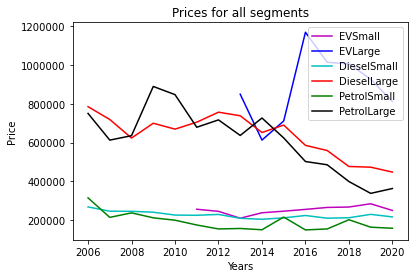

In [11]:
#Price
price_data = choice_data[['Year', 'Nypris', 'Fuel-size segment']].set_index(['Fuel-size segment'])
print("\nSize data for plotting:\n", price_data)

price_el_data = price_data.loc['ElSmall']
price_el_means = price_el_data.groupby('Year')['Nypris'].mean()
print("\nSize EL means:\n", price_el_means)

price_el_data1 = price_data.loc['ElLarge']
price_el_means1 = price_el_data1.groupby('Year')['Nypris'].mean()
print("\nSize EL means:\n", price_el_means1)

price_benzin_data = price_data.loc['BenzinSmall']
price_benzin_means = price_benzin_data.groupby('Year')['Nypris'].mean()
print("\nSize Benzin means :\n", price_benzin_means)

price_benzin_data1 = price_data.loc['BenzinLarge']
price_benzin_means1 = price_benzin_data1.groupby('Year')['Nypris'].mean()
print("\nSize Benzin means :\n", price_benzin_means1)

price_diesel_data = price_data.loc['DieselSmall']
price_diesel_means = price_diesel_data.groupby('Year')['Nypris'].mean()
print("\nSize Diesel means :\n", price_diesel_means)

price_diesel_data1 = price_data.loc['DieselLarge']
price_diesel_means1 = price_diesel_data1.groupby('Year')['Nypris'].mean()
print("\nSize Diesel means :\n", price_diesel_means1)

fig, ax = plt.subplots()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.plot(list(price_el_data['Year'].drop_duplicates()), price_el_means, color = 'm', label = 'EVSmall')
plt.plot(list(price_el_data1['Year'].drop_duplicates()), price_el_means1, color = 'b', label = 'EVLarge')
plt.plot(list(price_diesel_data['Year'].drop_duplicates()), price_diesel_means, color = 'c', label = 'DieselSmall')
plt.plot(list(price_diesel_data1['Year'].drop_duplicates()), price_diesel_means1, color = 'r', label = 'DieselLarge')
plt.plot(list(price_benzin_data['Year'].drop_duplicates()), price_benzin_means, color = 'g', label = 'PetrolSmall')
plt.plot(list(price_benzin_data1['Year'].drop_duplicates()), price_benzin_means1, color = 'k', label = 'PetrolLarge')

plt.xlabel("Years")
plt.ylabel("Price")
plt.title("Prices for all segments")
  
plt.legend()
plt.show()